In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!gdown 1M8JTBzRKF_q8Pw-YZ5cSybJ-eZOzcEHX
df = pd.read_csv('loan_data_set.csv')

Downloading...
From: https://drive.google.com/uc?id=1M8JTBzRKF_q8Pw-YZ5cSybJ-eZOzcEHX
To: /content/loan_data_set.csv
100% 38.0k/38.0k [00:00<00:00, 60.7MB/s]


In [3]:
# Contar o número de aprovações e rejeições
df['Loan_Status'].value_counts()

,count
Loan_Status,
Y,422
N,192


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


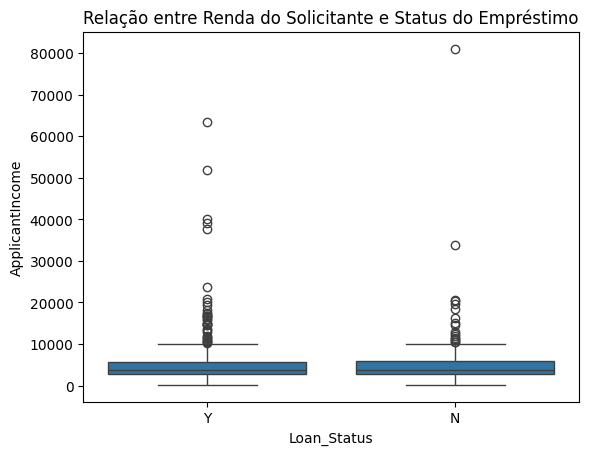

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotar a relação entre renda e status do empréstimo
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=df)
plt.title('Relação entre Renda do Solicitante e Status do Empréstimo')
plt.show()


In [5]:
# Verificar valores únicos na coluna de gênero
print(df['Gender'].value_counts(dropna=False))


Gender
Male      489
Female    112
NaN        13
Name: count, dtype: int64


In [6]:
# Preencher valores faltantes com o valor mais frequente
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)


<ipython-input-6-e7d0e3f58323>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)


In [7]:
# Remover linhas onde o gênero está faltando
df.dropna(subset=['Gender'], inplace=True)


In [8]:
# Criar dummies para gênero
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)


In [10]:
# Listar todas as colunas para verificar o nome exato da coluna 'Gender'
print(df.columns)



Index(['Loan_ID', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Gender_Male'],
      dtype='object')


In [11]:
# Contagem de homens e mulheres
print(df['Gender_Male'].value_counts())


Gender_Male
True     502
False    112
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


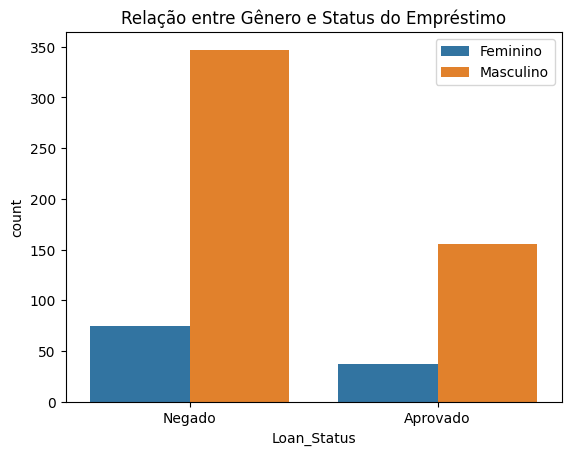

In [12]:
# Relação entre gênero e status do empréstimo
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Loan_Status', hue='Gender_Male')
plt.title('Relação entre Gênero e Status do Empréstimo')
plt.xticks([0, 1], ['Negado', 'Aprovado'])
plt.legend(['Feminino', 'Masculino'])
plt.show()


In [13]:
# Contar empréstimos aprovados/negados por histórico de crédito
df.groupby(['Credit_History', 'Loan_Status']).size()


Credit_History  Loan_Status
0.0             N               82
                Y                7
1.0             N               97
                Y              378
dtype: int64

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


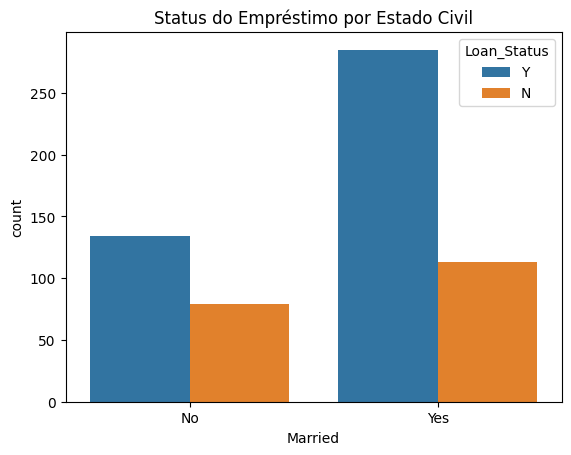

In [14]:
# Comparar status do empréstimo com estado civil
sns.countplot(x='Married', hue='Loan_Status', data=df)
plt.title('Status do Empréstimo por Estado Civil')
plt.show()


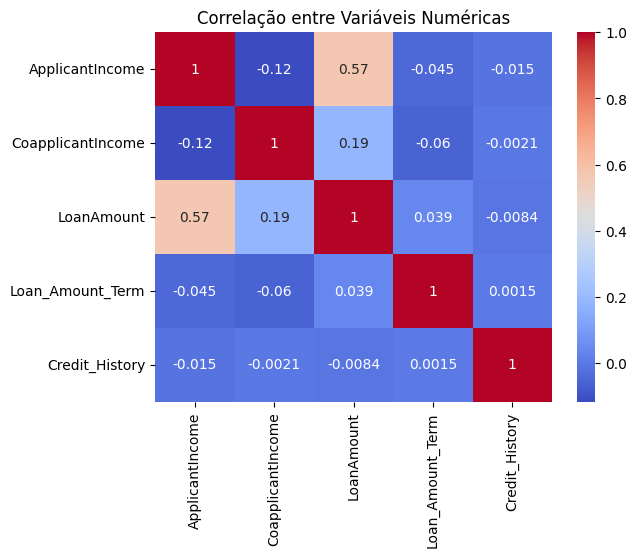

In [15]:
# Mostrar correlação entre as variáveis numéricas
corr = df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlação entre Variáveis Numéricas')
plt.show()


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Preenchendo dados faltantes
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(), inplace=True)
df['Credit_History'].fillna(1, inplace=True)

# Transformar variáveis categóricas em dummies
df = pd.get_dummies(df, drop_first=True)

# Separar as variáveis dependentes e independentes
X = df.drop('Loan_Status_Y', axis=1)
y = df['Loan_Status_Y']

# Separar em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Avaliar a acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy:.2f}')


<ipython-input-16-1f0f2a794fd3>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
<ipython-input-16-1f0f2a794fd3>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

Acurácia: 0.79


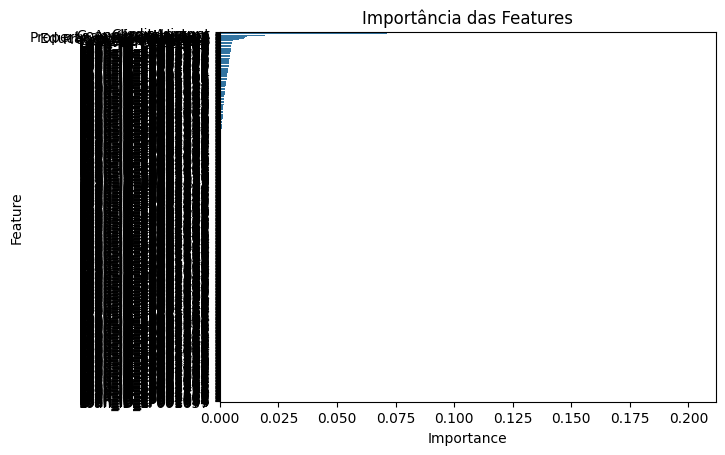

In [17]:
importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Visualizar a importância das features
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Importância das Features')
plt.show()


In [18]:
# Em vez de usar inplace=True
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())


In [19]:
# Substituir inplace=True
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())


In [20]:
# Substituir inplace=True
df['Credit_History'] = df['Credit_History'].fillna(1)


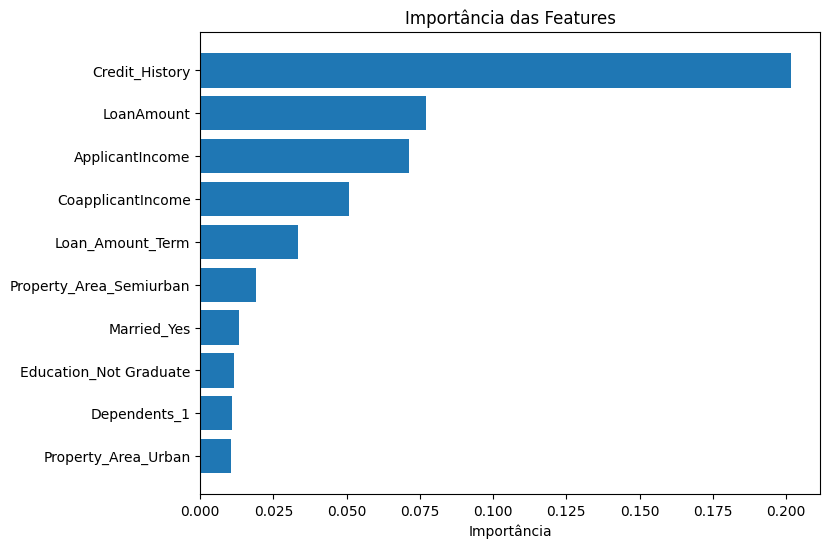

In [21]:
# Ordenar as features pela importância e plotar apenas as mais relevantes
importances = model.feature_importances_
indices = np.argsort(importances)[-10:]  # Exibir apenas as 10 mais importantes

plt.figure(figsize=(8, 6))
plt.title('Importância das Features')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [df.columns[i] for i in indices])
plt.xlabel('Importância')
plt.show()


In [31]:
# Para exibir todas as colunas do DataFrame
pd.set_option('display.max_columns', None)

# Exibir as primeiras linhas do DataFrame
df.head()

# Exibir a quantidade total de colunas
print("Total de colunas:", len(df.columns))





Total de colunas: 628


In [32]:
# Remover colunas que começam com 'Loan_ID'
df = df[df.columns.drop(list(df.filter(regex='Loan_ID')))]


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ApplicantIncome          614 non-null    int64  
 1   CoapplicantIncome        614 non-null    float64
 2   LoanAmount               614 non-null    float64
 3   Loan_Amount_Term         614 non-null    float64
 4   Credit_History           614 non-null    float64
 5   Gender_Male              614 non-null    bool   
 6   Married_Yes              614 non-null    bool   
 7   Dependents_1             614 non-null    bool   
 8   Dependents_2             614 non-null    bool   
 9   Dependents_3+            614 non-null    bool   
 10  Education_Not Graduate   614 non-null    bool   
 11  Self_Employed_Yes        614 non-null    bool   
 12  Property_Area_Semiurban  614 non-null    bool   
 13  Property_Area_Urban      614 non-null    bool   
 14  Loan_Status_Y            6

In [35]:
df.describe()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.855049
std,6109.041673,2926.248369,84.037468,64.372489,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [36]:
df.select_dtypes(include=['bool']).sum()


,0
Gender_Male,502
Married_Yes,398
Dependents_1,102
Dependents_2,101
Dependents_3+,51
Education_Not Graduate,134
Self_Employed_Yes,82
Property_Area_Semiurban,233
Property_Area_Urban,202
Loan_Status_Y,422


In [37]:
df[['Gender_Male', 'Married_Yes', 'Loan_Status_Y']].head()


,Gender_Male,Married_Yes,Loan_Status_Y
0,True,False,True
1,True,True,False
2,True,True,True
3,True,True,True
4,True,False,True


In [47]:
for col in df.columns.tolist():
  print('Número de missing na coluna {}: {}'.format(col, df[col].isnull().sum()))



Número de missing na coluna ApplicantIncome: 0
Número de missing na coluna CoapplicantIncome: 0
Número de missing na coluna LoanAmount: 0
Número de missing na coluna Loan_Amount_Term: 0
Número de missing na coluna Credit_History: 0
Número de missing na coluna Gender_Male: 0
Número de missing na coluna Married_Yes: 0
Número de missing na coluna Dependents_1: 0
Número de missing na coluna Dependents_2: 0
Número de missing na coluna Dependents_3+: 0
Número de missing na coluna Education_Not Graduate: 0
Número de missing na coluna Self_Employed_Yes: 0
Número de missing na coluna Property_Area_Semiurban: 0
Número de missing na coluna Property_Area_Urban: 0
Número de missing na coluna Loan_Status_Y: 0


In [48]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ApplicantIncome          614 non-null    int64  
 1   CoapplicantIncome        614 non-null    float64
 2   LoanAmount               614 non-null    float64
 3   Loan_Amount_Term         614 non-null    float64
 4   Credit_History           614 non-null    float64
 5   Gender_Male              614 non-null    bool   
 6   Married_Yes              614 non-null    bool   
 7   Dependents_1             614 non-null    bool   
 8   Dependents_2             614 non-null    bool   
 9   Dependents_3+            614 non-null    bool   
 10  Education_Not Graduate   614 non-null    bool   
 11  Self_Employed_Yes        614 non-null    bool   
 12  Property_Area_Semiurban  614 non-null    bool   
 13  Property_Area_Urban      614 non-null    bool   
 14  Loan_Status_Y            6